<a href="https://colab.research.google.com/github/haiderzm/NeuralNetwithPyTorch/blob/master/CIFAR10_Conv_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets,transforms
import matplotlib.pyplot as plt
import numpy as np

In [0]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.35,0.35,0.35),(0.33,0.33,0.33))])

In [4]:
trainset = datasets.CIFAR10(root='.\data',train=True,download=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size = 64)
images,labels = next(iter(trainloader))

0it [00:00, ?it/s]

100%|█████████▉| 170352640/170498071 [00:42<00:00, 2958847.91it/s]

In [0]:
def imshow(img):
    img = img-0.05
    plt.imshow(np.transpose(img,(1,2,0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(1)


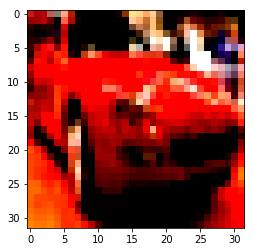

In [6]:
imshow(images[5])
print(labels[5])

In [0]:
device = "cuda:0" if torch.cuda.is_available else "cpu"
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [8]:
testset = datasets.CIFAR10(root='.\data',train=False,download=True,transform=transform)
testloader = torch.utils.data.DataLoader(trainset,batch_size = 64)

Files already downloaded and verified


In [0]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(3 , 16 , 3 , padding = 1)
        self.conv2 = nn.Conv2d(16 , 32 , 3 , padding = 1)
        self.conv3 = nn.Conv2d(32 , 64 , 3 , padding = 1)
        self.pool = nn.MaxPool2d(2 , 2)
        
        self.fc1 = nn.Linear(64 * 4 * 4, 500)
        self.fc2 = nn.Linear(500 , 10)
        self.dropout = nn.Dropout(p = 0.2)
        
    def forward(self,x):
        
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1,64*4*4)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        x = F.softmax(x,dim = 1)
        
        return x
        

In [20]:
model = Net()
model.to(device)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [25]:
acc_arr = []
num_epochs=50
testing_loss=[]
training_loss=[]
def testset_accuracy(epoch):
    correct = 0
    total = 0
    testloss = 0
    
    with torch.no_grad():
        for data in testloader:
            images,labels = data
            images,labels = images.to(device),labels.to(device)
            outputs = model(images)
            testloss+=criterion (outputs,labels)
            _,predicted = torch.max(outputs.data,1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
        acc_arr.append(100*correct/total)
        testing_loss.append(testloss.item())
        print('Epoch :',epoch,'Test Accuracy : %d %%' %(100*correct/total))
        
        
for epoch in range(num_epochs):
    running_loss = 0
    for i,data in enumerate(trainloader,0):
        images,labels = data
        images,labels = images.to(device),labels.to(device)
        optimizer.zero_grad()
        
        outputs = model(images)
        
        loss = criterion(outputs,labels)
        
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
        
    training_loss.append(running_loss)
    testset_accuracy(epoch+1)

Epoch : 1 Test Accuracy : 45 %
Epoch : 2 Test Accuracy : 53 %
Epoch : 3 Test Accuracy : 60 %
Epoch : 4 Test Accuracy : 61 %
Epoch : 5 Test Accuracy : 64 %
Epoch : 6 Test Accuracy : 66 %
Epoch : 7 Test Accuracy : 68 %
Epoch : 8 Test Accuracy : 69 %
Epoch : 9 Test Accuracy : 70 %
Epoch : 10 Test Accuracy : 72 %
Epoch : 11 Test Accuracy : 72 %
Epoch : 12 Test Accuracy : 73 %
Epoch : 13 Test Accuracy : 70 %
Epoch : 14 Test Accuracy : 73 %
Epoch : 15 Test Accuracy : 74 %
Epoch : 16 Test Accuracy : 76 %
Epoch : 17 Test Accuracy : 74 %
Epoch : 18 Test Accuracy : 75 %
Epoch : 19 Test Accuracy : 76 %
Epoch : 20 Test Accuracy : 76 %
Epoch : 21 Test Accuracy : 76 %
Epoch : 22 Test Accuracy : 78 %
Epoch : 23 Test Accuracy : 75 %
Epoch : 24 Test Accuracy : 78 %
Epoch : 25 Test Accuracy : 76 %
Epoch : 26 Test Accuracy : 77 %
Epoch : 27 Test Accuracy : 78 %
Epoch : 28 Test Accuracy : 77 %
Epoch : 29 Test Accuracy : 78 %
Epoch : 30 Test Accuracy : 77 %
Epoch : 31 Test Accuracy : 78 %
Epoch : 32 Test A

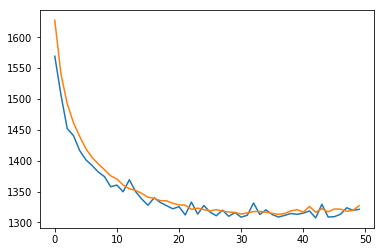

In [27]:
plt.plot(testing_loss,label='testing loss')
plt.plot(training_loss,label='training loss')

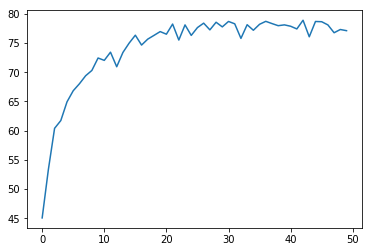

In [28]:
plt.plot(acc_arr)